In [1]:
import tensorflow as tf
import os

In [6]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
cpus = tf.config.experimental.list_physical_devices('GPU')
for cpu in cpus:
    tf.config.experimental.set_memory_growth(cpu, True)

In [8]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

C:\Users\KIIT\AppData\Local\Temp\ipykernel_36036\3538499753.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'dataset'

In [10]:
os.listdir(os.path.join(data_dir, 'normal'))

['row_10.png',
 'row_11.png',
 'row_12.png',
 'row_13.png',
 'row_14.png',
 'row_15.png',
 'row_25.png',
 'row_26.png',
 'row_27.png',
 'row_28.png',
 'row_29.png',
 'row_32.png',
 'row_33.png',
 'row_34.png',
 'row_35.png',
 'row_36.png',
 'row_37.png',
 'row_38.png',
 'row_39.png',
 'row_7.png',
 'row_8.png',
 'row_9.png',
 'st_CAB_output.jpg']

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**Load Data**

In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
#tf.keras.utils.image_dataset_from_directory??

In [16]:
# --- 1. Define 'data' ---
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Infers labels from directory structure
    label_mode='categorical',  # One-hot encoded labels
    image_size=(256, 256),  # Adjust if your images have different dimensions
    batch_size=8,  # Adjust based on your memory constraints
)

Found 39 files belonging to 3 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch[0].shape

(8, 256, 256, 3)

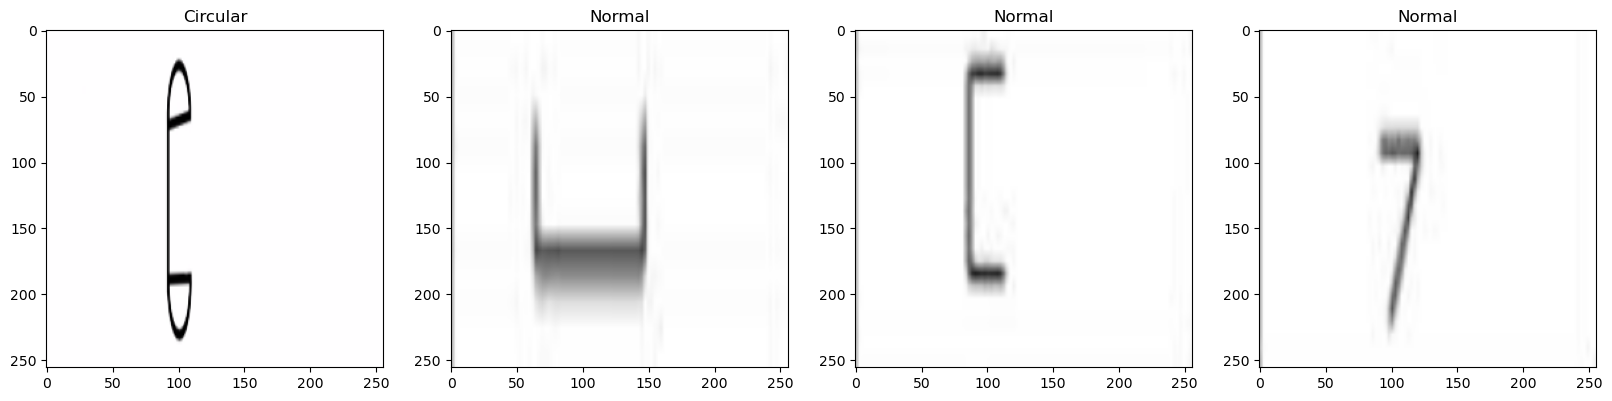

In [20]:
class_names = {
    0: "Circular",
    1: "Normal",
    2: "Overlapping"
}


fig, ax = plt.subplots(ncols=4, figsize=(20, 25))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    # Convert NumPy array to a hashable type (e.g., integer)
    label_index = np.argmax(batch[1][idx])  # Get index of the highest probability class
    ax[idx].title.set_text(class_names.get(label_index, "Unknown"))

    # Add x and y ticks (adjust values based on your image dimensions)
    ax[idx].set_xticks(np.arange(0, img.shape[1], 50))  # Ticks every 50 pixels on x-axis
    ax[idx].set_yticks(np.arange(0, img.shape[0], 50))  # Ticks every 50 pixels on y-axis

    # Optionally, label the ticks with pixel values
    ax[idx].set_xticklabels(np.arange(0, img.shape[1], 50))
    ax[idx].set_yticklabels(np.arange(0, img.shape[0], 50))

plt.show()

**Scale Data**

In [21]:
data = data.map(lambda x,y: (x/255, y))
# important since it helps to perform transformation to convert image min to 0 and max to 1
# important while working with data pipeline

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.6862745 , 0.6862745 , 0.6862745 ],
          [0.7224265 , 0.7224265 , 0.7224265 ],
          [0.85110295, 0.85110295, 0.85110295],
          ...,
          [0.9888327 , 0.9888327 , 0.9888327 ],
          [0.979182  , 0.979182  , 0.979182  ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         [[0.6862745 , 0.6862745 , 0.6862745 ],
          [0.7224265 , 0.7224265 , 0.7224265 ],
          [0.85110295, 0.85110295, 0.85110295],
          ...,
          [0.9888327 , 0.9888327 , 0.9888327 ],
          [0.979182  , 0.979182  , 0.979182  ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         [[0.6862745 , 0.6862745 , 0.6862745 ],
          [0.7224265 , 0.7224265 , 0.7224265 ],
          [0.85110295, 0.85110295, 0.85110295],
          ...,
          [0.9888327 , 0.9888327 , 0.9888327 ],
          [0.979182  , 0.979182  , 0.979182  ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         ...,
 
         [[0.7176471 , 0.7176471 , 0.7176471 ],
          [0.75018

**Split Data**

In [23]:
len(data) # num of batches

5

In [24]:
#batch_size = 32

In [25]:
# train_batches = int(len(data) * 0.7) // batch_size
# val_batches = int(len(data) * 0.2) // batch_size
# test_batches = int(len(data) * 0.1) // batch_size

In [26]:
# test_batches

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [28]:
val_size

1

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Established train, test and val partition

In [30]:
train_labels = np.concatenate([y for x, y in train], axis=0)
val_labels = np.concatenate([y for x, y in val], axis=0)
test_labels = np.concatenate([y for x, y in test], axis=0)

# One-hot encode the labels (if needed for your model)
train_labels = tf.keras.utils.to_categorical(train_labels)
val_labels = tf.keras.utils.to_categorical(val_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

**Building the Deep Learning Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
num_classes = 3
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

C:\Users\KIIT\anaconda3\envs\ai_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Train**

In [35]:
logdir = 'logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.6354 - loss: 3.1901 - val_accuracy: 0.5000 - val_loss: 2.1077
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.1354 - loss: 2.8646 - val_accuracy: 0.7500 - val_loss: 1.0254
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.6146 - loss: 1.0680 - val_accuracy: 0.5000 - val_loss: 1.0260
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.5104 - loss: 0.9961 - val_accuracy: 0.7500 - val_loss: 0.7263
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.6927 - loss: 0.9151 - val_accuracy: 0.7500 - val_loss: 0.7804
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.5677 - loss: 0.8672 - val_accuracy: 0.7500 - val_loss: 1.0080
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.6719 - loss: 0.9831 - val_accuracy: 0.7500 - val_loss: 0.8861
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5885 - loss: 0.9282 - val_accuracy: 0.6250 - val_loss:

In [38]:
hist.history

{'accuracy': [0.5833333134651184,
  0.2083333283662796,
  0.6666666865348816,
  0.5833333134651184,
  0.6666666865348816,
  0.5416666865348816,
  0.75,
  0.5833333134651184,
  0.6666666865348816,
  0.9166666865348816,
  0.75,
  0.7916666865348816,
  0.75,
  0.9583333134651184,
  0.9166666865348816,
  0.8333333134651184,
  0.9583333134651184,
  0.9583333134651184,
  0.875,
  0.9583333134651184],
 'loss': [4.001884937286377,
  2.2141265869140625,
  1.048383355140686,
  0.950351893901825,
  0.9937984943389893,
  0.9250267148017883,
  0.9485390782356262,
  0.8765401840209961,
  0.8236543536186218,
  0.6717438101768494,
  0.5021460652351379,
  0.5696555376052856,
  0.4785975217819214,
  0.4026321470737457,
  0.23715393245220184,
  0.3639519214630127,
  0.23854809999465942,
  0.21789133548736572,
  0.25012898445129395,
  0.15816187858581543],
 'val_accuracy': [0.5,
  0.75,
  0.5,
  0.75,
  0.75,
  0.75,
  0.75,
  0.625,
  0.875,
  0.75,
  0.75,
  0.875,
  1.0,
  0.875,
  0.875,
  1.0,
  0.87

**Plot Performance**

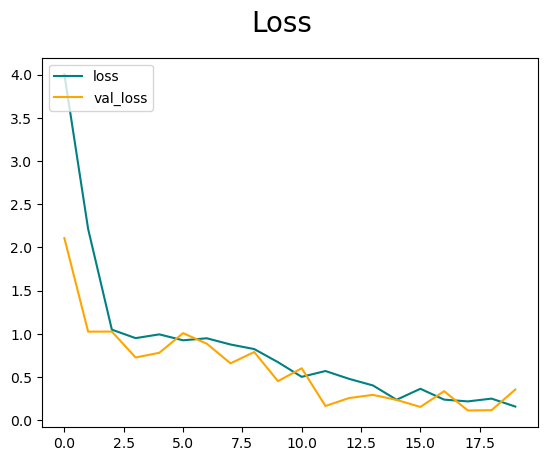

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

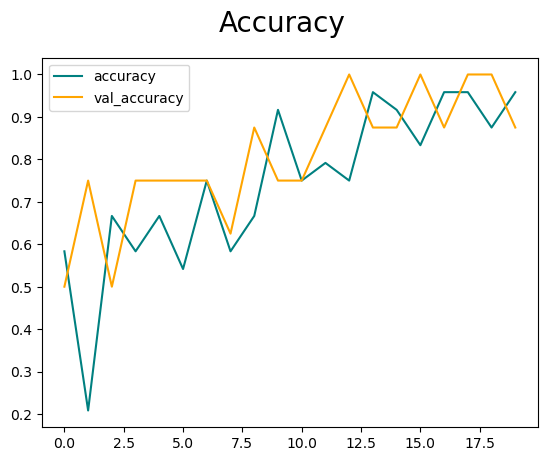

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate Performance**

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
# Establishing instances
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


In [45]:
print(f'Precision:{pre.result()}, Recall:{re.result().numpy()}, Acuraccy:{acc.result().numpy}')

Precision:1.0, Recall:1.0, Acuraccy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


**Test**

In [46]:
import cv2

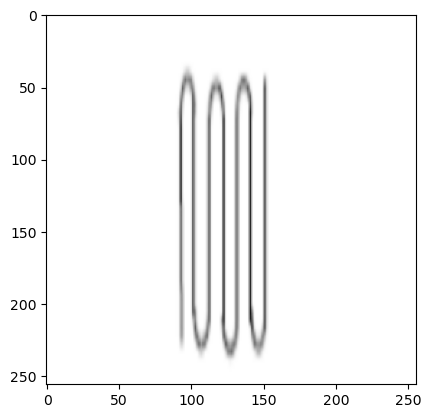

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image belong to the Circular class


In [49]:
# Load and preprocess the image
img = cv2.imread('eval2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
predict = model.predict(np.expand_dims(resize/255, 0))

# Assuming you have 3 classes (Sad, Happy, Neutral)
class_names = ['Circular', 'Normal', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')

**Saving the model**

In [198]:
from tensorflow.keras.models import load_model

In [199]:
model.save('imageclassifier.keras')